In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_master = pd.read_csv("/project/data/CASP004-01/masterfile.csv")
df_master['product_brand'] = df_master['product_brand'].str.rstrip()
def correct_product_brand_spacing(df, column_name):
    # Add a space before the slash if it's not there and remove extra spaces after the slash
    df[column_name] = df[column_name].str.replace(r'/', ' / ').str.replace(r'\s+', ' ', regex=True)
    return df

df_master = correct_product_brand_spacing(df_master, 'product_brand')
df_master['material_I'] = df_master['material_I'].str.replace('Bioopolymer', 'Biopolymer')


In [5]:
df_end = df_master[df_master['trial_stage'] == 'End']
df_non_outlier = df_end[df_end['outlier_alert']==False]

def bar_whisker_plot(df, x, y, outlier):
    iqr = df.groupby(x)[y].apply(lambda g: g.quantile(0.75) - g.quantile(0.25))
    nonzero_iqr_order = df[df[x].isin(iqr[iqr > 0].index)].groupby(x)[y].median().sort_values(ascending=False).index
    zero_iqr_order = iqr[iqr == 0].index
    order = nonzero_iqr_order.append(zero_iqr_order)
    plt.figure(figsize=(12, 8))
    sns.boxplot(data = df, x=x, y=y, order=order)
    plt.title(f'{y} for Each {x} {outlier}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_violin(df, x, y):
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=x, y=y, data=df, palette="viridis")
    plt.title('Violin Plot of % Residual for Each {x} Type')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Average Weight Pre and Post Composting

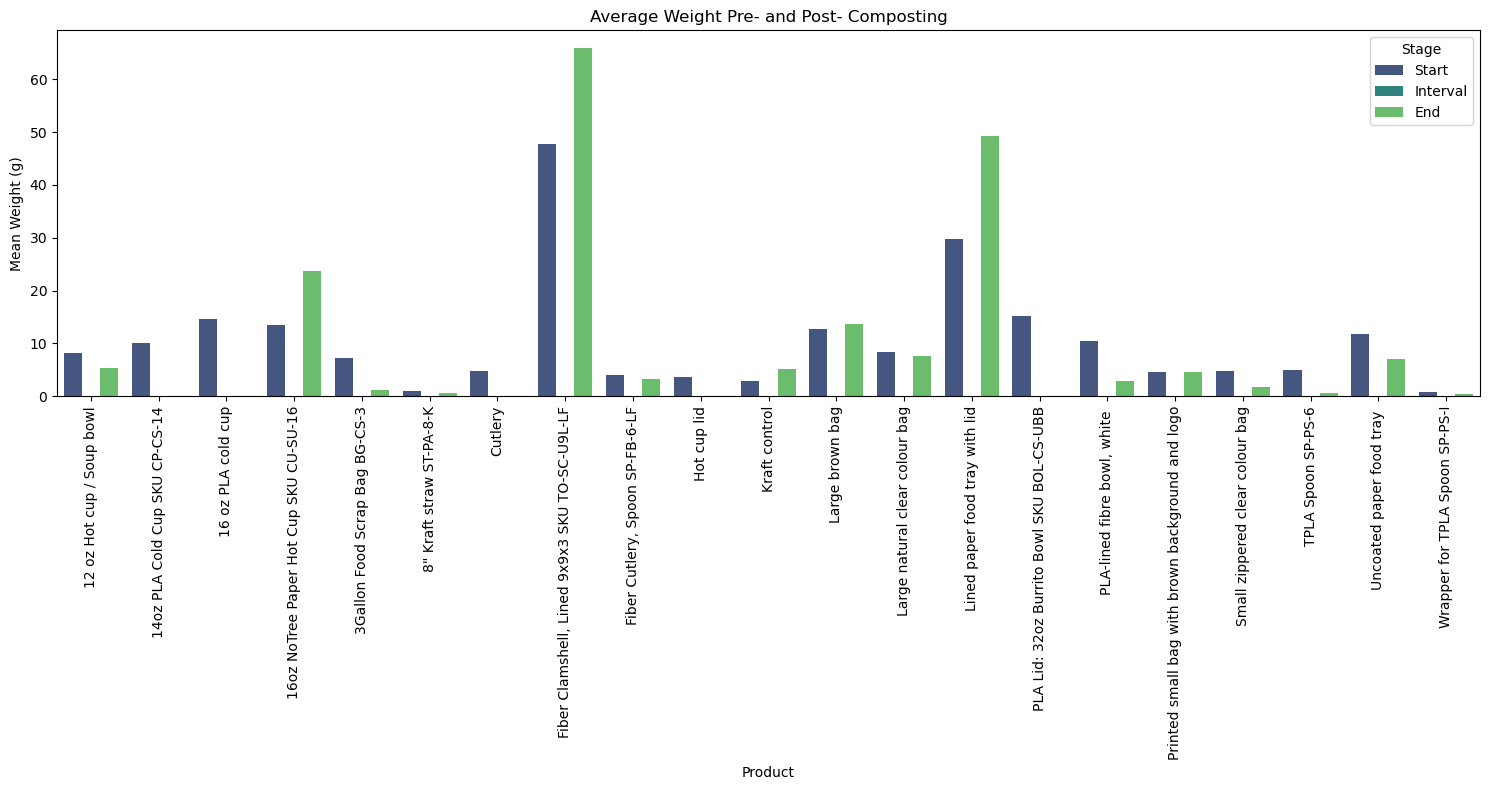

In [6]:
stage_order = pd.CategoricalDtype(
    categories=["Start", "Interval", "End"],
    ordered=True
)
df_master['trial_stage'] = df_master['trial_stage'].astype(stage_order)

stages_ordered = df_master.groupby(['product_name', 'trial_stage'])['mean_weight_final_g'].mean().reset_index().round(2)
plt.figure(figsize=(15, 8))
sns.barplot(x='product_name', y='mean_weight_final_g', hue='trial_stage', data=stages_ordered, palette="viridis")
plt.title('Average Weight Pre- and Post- Composting')
plt.xlabel('Product')
plt.ylabel('Mean Weight (g)')
plt.xticks(rotation=90)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

## Note on Anomaly Detection

For each observation, we check whether the final post-decomposition weight is smaller than 
the original manufacturing weight of the product tested. If this is not true, this product 
likely clumped with other products and represents an anomaly. We want to tag it as an anomaly (currently we use
the misleading variable of "outlier_alert") so that we can perform anomaly specific analyses downstream. 

## % Residual by Products

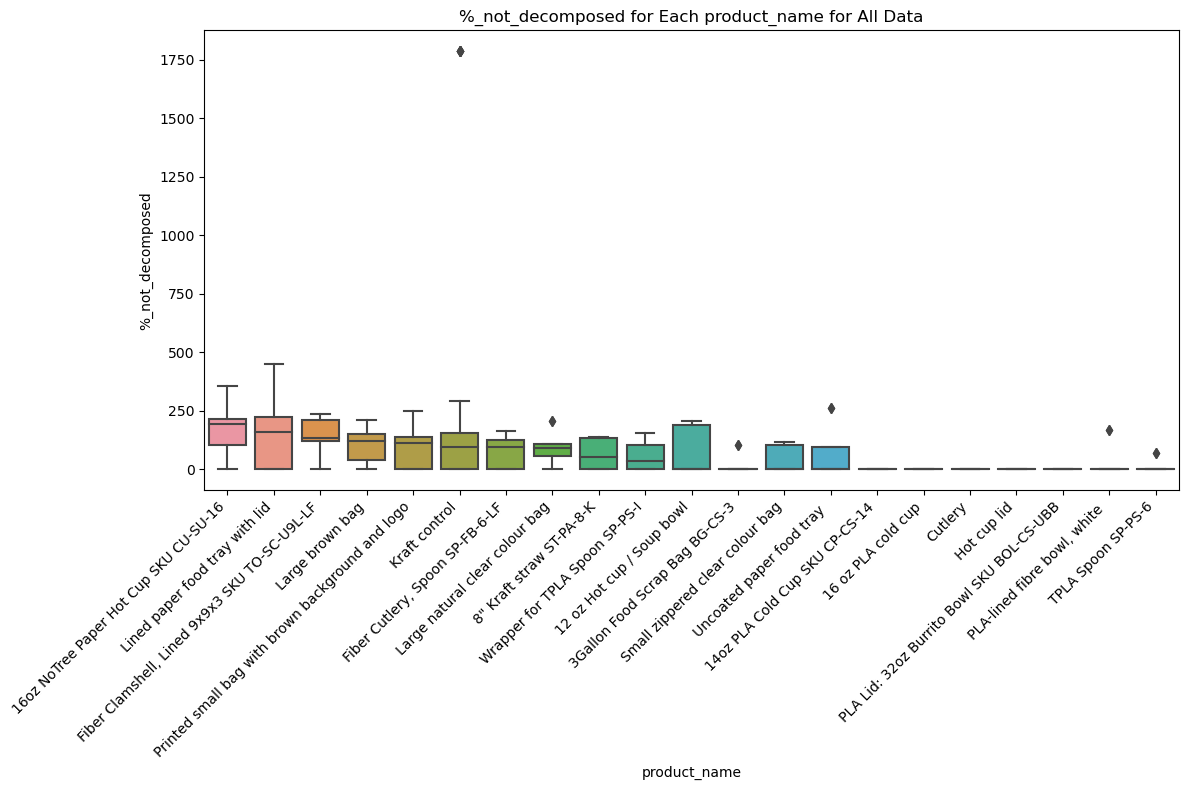

In [7]:
bar_whisker_plot(df_end, 'product_name', '%_not_decomposed', 'for All Data')

In [8]:
df_end.groupby('product_name')['%_not_decomposed'].median().sort_values(ascending=False)

product_name
16oz NoTree Paper Hot Cup SKU CU-SU-16              191.570
Lined paper food tray with lid                      159.730
Fiber Clamshell, Lined 9x9x3 SKU TO-SC-U9L-LF       130.910
Large brown bag                                     121.265
Printed small bag with brown background and logo    112.145
Kraft control                                        96.490
Fiber Cutlery, Spoon SP-FB-6-LF                      96.490
Large natural clear colour bag                       90.000
8" Kraft straw ST-PA-8-K                             52.335
Wrapper for TPLA Spoon SP-PS-I                       33.535
14oz PLA Cold Cup SKU CP-CS-14                        0.000
Hot cup lid                                           0.000
Cutlery                                               0.000
3Gallon Food Scrap Bag BG-CS-3                        0.000
PLA Lid: 32oz Burrito Bowl SKU BOL-CS-UBB             0.000
PLA-lined fibre bowl, white                           0.000
16 oz PLA cold cup         

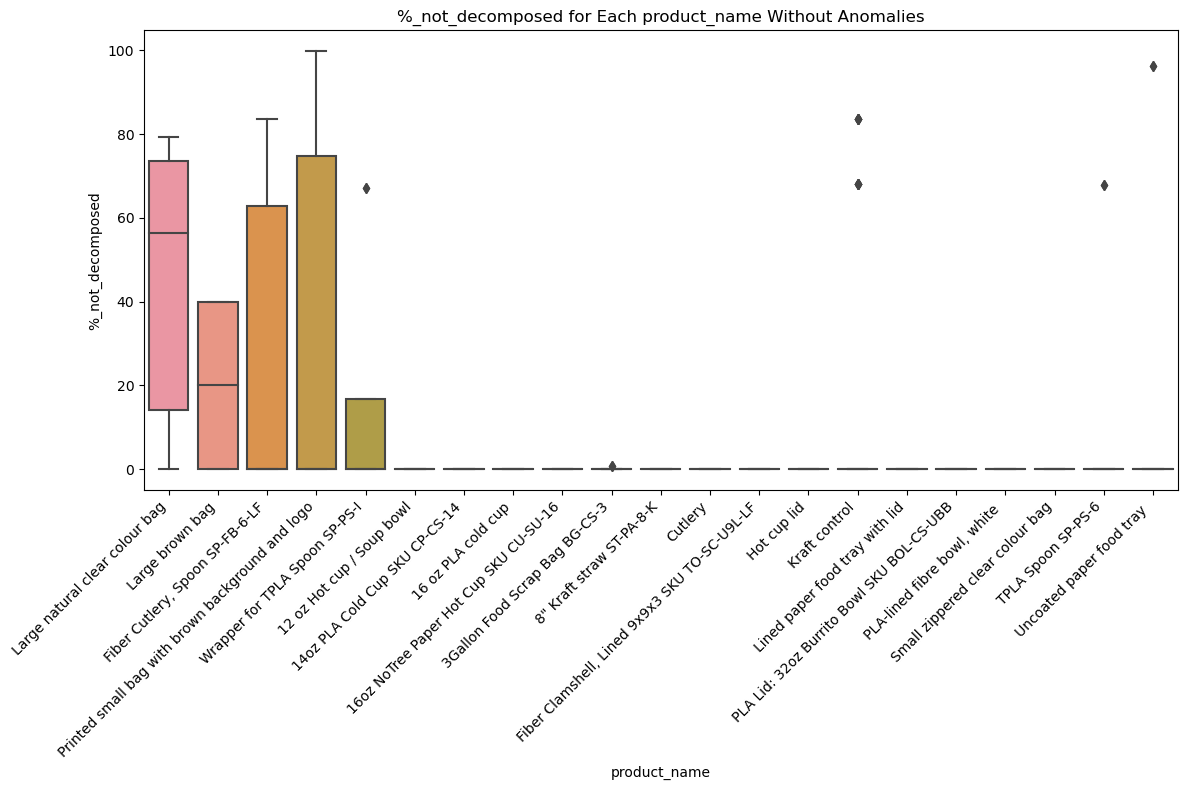

In [9]:
bar_whisker_plot(df_non_outlier, 'product_name', '%_not_decomposed', 'Without Anomalies')

## % Residual by Material Class I

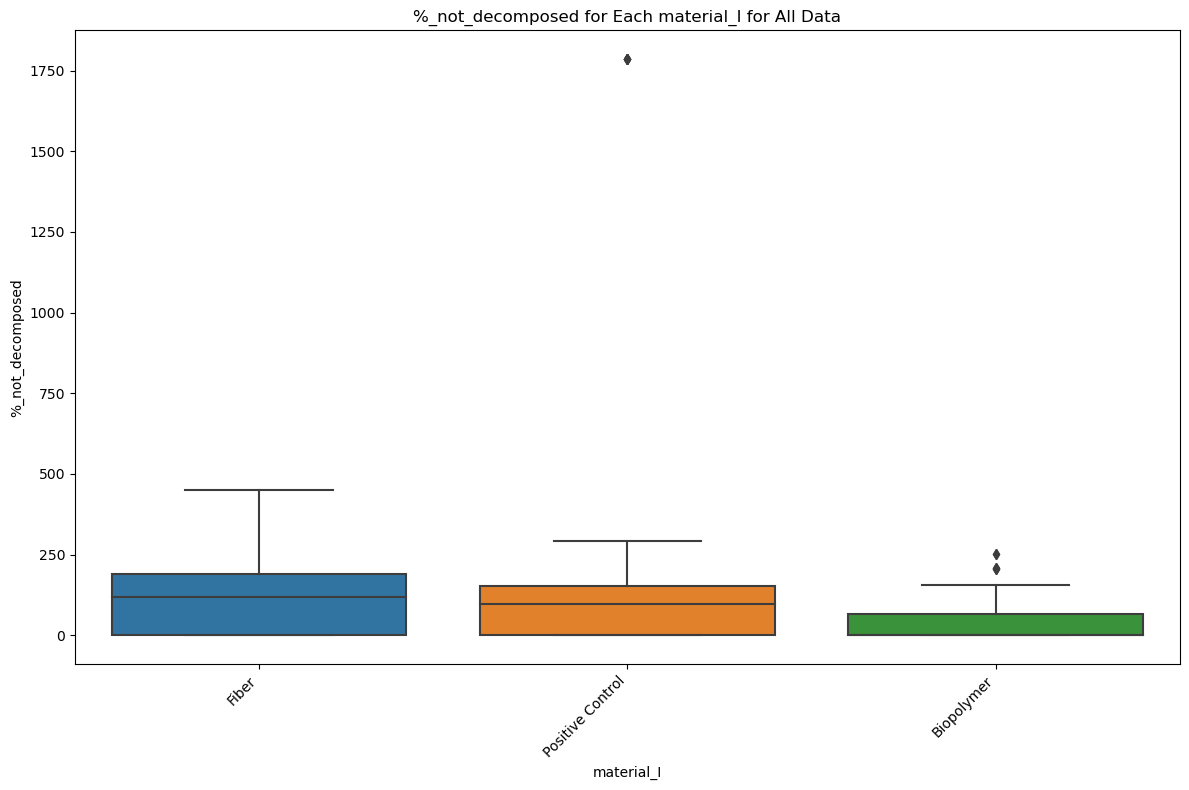

In [10]:
bar_whisker_plot(df_end, 'material_I', '%_not_decomposed', 'for All Data')

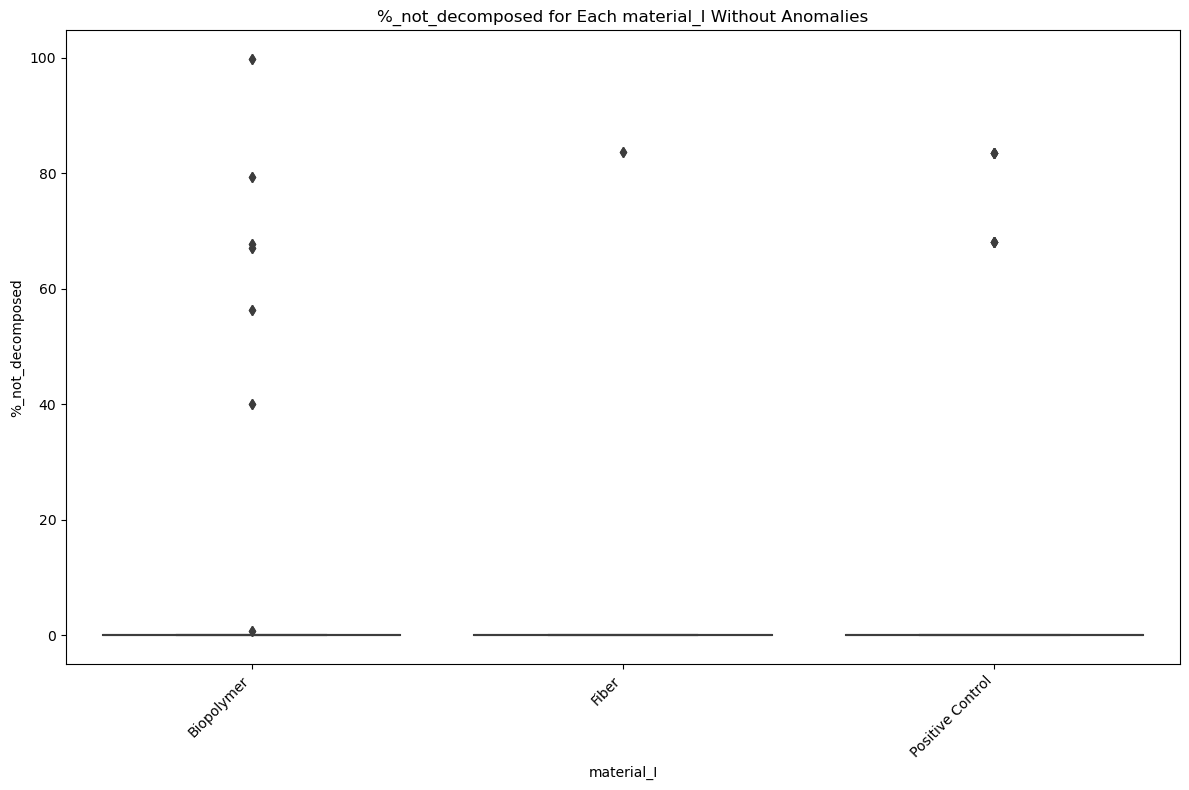

In [11]:
bar_whisker_plot(df_non_outlier, 'material_I', '%_not_decomposed', 'Without Anomalies')

## Violin Plots as Possible Format

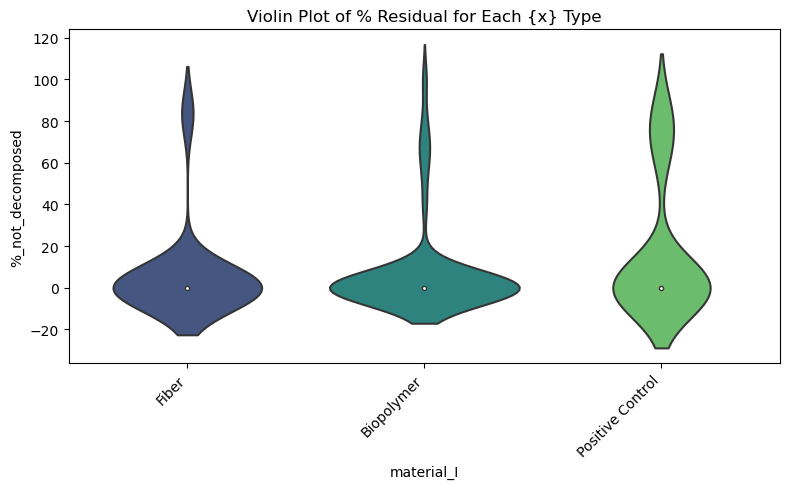

In [21]:
plot_violin(df_non_outlier, 'material_I', '%_not_decomposed')